In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
from glob import glob

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from parse_ann import *
from draw_utils import *

In [7]:
path_data = '/workdir/datasets/msc/UFRGS_CELL_2classes/train'

In [14]:
path_imgs = sorted(glob(os.path.join(path_data, 'imgs', '*')))
path_ann  = sorted(glob(os.path.join(path_data, 'annotations', 'alpr', '*')))

In [18]:
anns = get_ann(path_ann)

In [ ]:
draw = draw_ann(path_imgs[0], anns[path_ann[0]])

In [ ]:
img, draw = draw_heatmap(path_imgs[4], anns[path_ann[4]])

plt.figure(figsize=(10,10))
plt.imshow(draw)

In [ ]:
df = get_csv(path_ann)
df

In [ ]:
centers = get_centers(path_imgs[6], anns[path_ann[6]])
plt.figure(figsize=(15,15))
plt.imshow(centers)

In [11]:
shapes = get_shapes(path_imgs[6], anns[path_ann[6]])
shapes[0]

((572.0, 235.0), (163.99996948242188, 79.99998474121094), -0.0)

In [21]:
from tqdm import tqdm
#import multiprocessing
#from joblib import Parallel, delayed
#NUM_CORES = multiprocessing.cpu_count()
import tensorflow as tf

resize = (512,512)
reduce = 16

displacements = []
for i in tqdm(range(len(path_imgs))):
    # get the center points
    centers = get_centers(path_imgs[i], anns[path_ann[i]], resize=resize)
    displacements.extend(ann2gt(centers, reduce)[1])
    
    if max(displacements)==5:
        break

print('max distance to center: ', max(displacements))

#with Parallel(n_jobs=NUM_CORES, prefer="threads") as parallel:
#    _ = parallel(delayed(_verify_ratio)(i) for i in tqdm(range(len(path_imgs))))

  0%|          | 0/159 [00:00<?, ?it/s]


IndexError: too many indices for array

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1] [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 5, 1, 5, 2, 3, 0, 1, 0, 1, 0, 2]


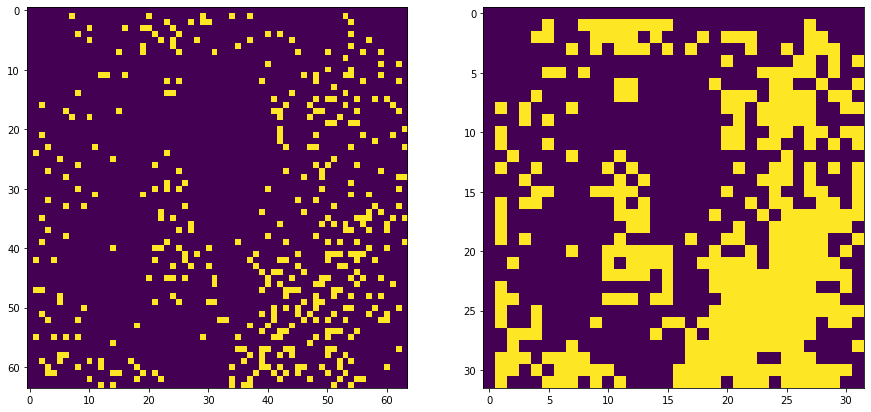

In [26]:
gt64,d64 = ann2gt(centers, 8)
gt32,d32 = ann2gt(centers, 16)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(gt64)
plt.subplot(122)
plt.imshow(gt32)

print(d64,d32)

(array([45., 45.,  0.,  0.,  0.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

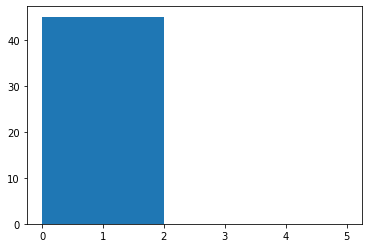

In [11]:
plt.hist(displacements, bins=range(0,6))

In [145]:
5*32

160

In [110]:
np.sum(NR_CENTERS)

118

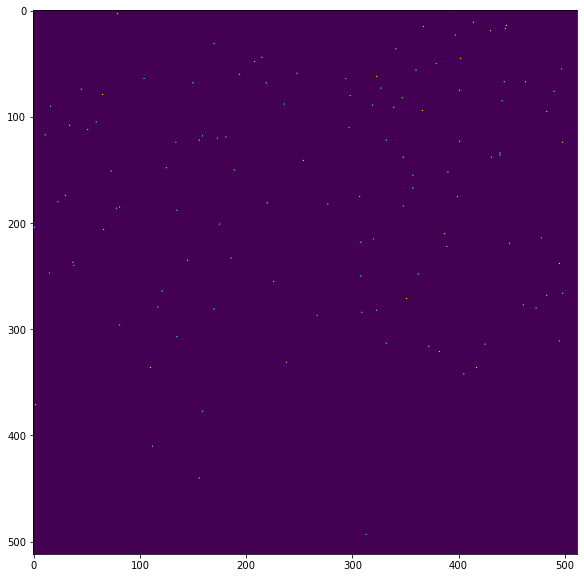

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(patches.reshape(512,512))

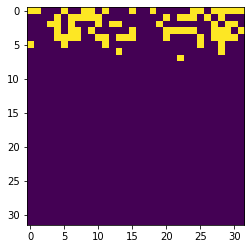

In [30]:
plt.imshow(ground_truth)

In [28]:
np.zeros(reduce*reduce).shape

(1024,)

In [ ]:
from skimage.measure import block_reduce
from tqdm import tqdm

th = 1.0
downsizes, nr_boxes = [],[]
for i in tqdm(range(len(path_imgs))):
    
    centers = draw_centers(path_imgs[i], anns[path_ann[i]])
    nr_b = len(centers[centers==255])
    nr_boxes.append(nr_b)
    
    reduced = np.copy(centers)
    for s in [2,4,8,16,32]:
        reduced = block_reduce(reduced, (2,2), np.max)
        
        if len(reduced[reduced==255])<th*nr_b:
            downsizes.append(s)
            break

In [ ]:
plt.figure(figsize=(15,5))
hist = plt.hist(nr_boxes, cumulative=1, density=True, bins=100)

np.max(nr_boxes), np.min(nr_boxes)

In [ ]:
th = 0.95

idx = np.argmin(np.abs(hist[0]-th))
hist[0][idx], hist[1][idx]

In [ ]:
val = 100

idx = np.argmin(np.abs(hist[1]-val))
hist[0][idx], hist[1][idx]

In [ ]:
plt.figure(figsize=(15,5))
hist = plt.hist(downsizes, bins=range(2,34), cumulative=-1, density=True)
plt.title('Cumulative Histogram')
plt.grid('on')

np.mean(downsizes), np.std(downsizes), np.min(downsizes)

In [ ]:
th = 0.9

idx = np.argmin(np.abs(hist[0]-th))
hist[0][idx], hist[1][idx]

In [ ]:
val = 16

idx = np.argmin(np.abs(hist[1]-val))
hist[0][idx], hist[1][idx]